# 🌍 World CO₂ Emissions — EDA (Country–Year Format)

This notebook performs a complete exploratory data analysis (EDA) on a **country–year emissions dataset**.

The dataset includes:
- Country identifiers (`Country Name`, `Country Code`)
- A `YEAR` column
- Multiple emissions-related indicators (CO₂, methane, nitrous oxide, total GHG, etc.)

We will explore:
- Data quality (missing values, duplicates, types)
- Univariate distributions (per year & per metric)
- Bivariate relationships (between indicators and across time)
- Multivariate patterns (correlation and joint behaviour)


In [1]:

# === 1. Setup & Load Data ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.style.use("default")

# Load the attached dataset
df = pd.read_csv(r"C:\Users\brien\OneDrive\Documents\2nd Sem\CAPSTONE\dataset 1 worked on\Cleaned CO2 Dataset 1.csv")

print("Loaded shape:", df.shape)
df.head()


Loaded shape: (16678, 34)


,Country Name,Country Code,YEAR,Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP),...,GHG net emissions/removals by LUCF (Mt of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),Methane emissions in energy sector (thousand metric tons of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",PFC gas emissions (thousand metric tons of CO2 equivalent),SF6 gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent)
0,Afghanistan,ABW,1960,20.345601,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
1,Afghanistan,ABW,1961,20.227645,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
2,Afghanistan,ABW,1962,21.640583,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
3,Afghanistan,ABW,1963,20.675552,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068
4,Afghanistan,ABW,1964,21.672662,4.881986e+06,22.556391,22.556391,19.826444,19.877825,19.826444,...,22.005843,25.669,28.254785,22.002,23.745049,21.672662,22.005843,23.745049,23.745049,29.753068


## 2) Data Cleaning & Structure

Here we:
- Inspect shape, column names, and dtypes  
- Check missing values and duplicates  
- Separate **numeric vs categorical** columns  
- Impute missing values (median for numeric, mode for categorical)  
- Fix the `YEAR` datatype  


In [2]:

# === 2.1 Basic inspection ===

print("Initial shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types (first 20):")
print(df.dtypes.head(20))

print("\nMissing values per column (first 20):")
print(df.isna().sum().head(20))

print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Identify numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric columns (first 10):", numeric_cols[:10])
print("Categorical columns:", categorical_cols)

# Impute numerical with median
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Impute categorical with mode
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        mode_vals = df[col].mode()
        if len(mode_vals) > 0:
            df[col] = df[col].fillna(mode_vals[0])

# Fix YEAR
if "YEAR" in df.columns:
    df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce").astype("Int64")

print("\nMissing values after imputation (first 20):")
print(df.isna().sum().head(20))


Initial shape: (16678, 34)

Column names:
['Country Name', 'Country Code', 'YEAR', 'Adjusted savings: carbon dioxide damage (% of GNI)', 'Adjusted savings: carbon dioxide damage (current US$)', 'Agricultural methane emissions (thousand metric tons of CO2 equivalent)', 'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'CO2 emissions (kg per 2015 US$ of GDP)', 'CO2 emissions (kg per 2017 PPP $ of GDP)', 'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from gaseous fuel consumption (kt)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)', 'CO2 emissions from other sectors, excluding residential

## 3) Summary Statistics

We now look at:

- Descriptive statistics for numeric indicators  
- Top categories for key categorical fields  


In [3]:

# Numerical summary
print("Numerical summary (first 15 numeric columns):")
display(df[numeric_cols].describe().T.head(15))

# Categorical summary
for col in categorical_cols:
    print(f"\nTop categories for: {col}")
    display(df[col].value_counts().head(10))


Numerical summary (first 15 numeric columns):


,count,mean,std,min,25%,50%,75%,max
YEAR,16678.0,1990.5,17.896067,1960.0,1975.0,1990.5,2006.0,2021.0
Adjusted savings: carbon dioxide damage (% of GNI),16678.0,1300841.713367,10160083.96566,0.003235,0.87062,2.166412,20.645257,80651255.21
Adjusted savings: carbon dioxide damage (current US$),16678.0,1450731942.473531,11953244465.30212,19.417939,22.14348,4881986.1505,169110292.95,429190000000.0
Agricultural methane emissions (thousand metric tons of CO2 equivalent),16678.0,1351347.775018,10100077.025966,0.0,20.391778,22.556391,4996.529375,80651255.21
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),16678.0,1325812.793752,10100641.029692,0.0,20.391778,22.556391,3726.5794,80651255.21
CO2 emissions (kg per 2015 US$ of GDP),16678.0,1286337.684437,10104193.482731,0.0,0.476221,19.826444,21.092993,80651255.21
CO2 emissions (kg per 2017 PPP $ of GDP),16678.0,1286338.565254,10104193.370615,0.0,0.251019,19.877825,21.265255,80651255.21
CO2 emissions (kg per PPP $ of GDP),16678.0,1286338.50841,10104193.377854,0.0,0.30108,19.826444,21.265255,80651255.21
CO2 emissions (kt),16678.0,1741167.972336,10302875.107367,0.0,20.625,29.685132,17902.475,80651255.21
CO2 emissions (metric tons per capita),16678.0,1286337.779045,10104193.470654,0.0,3.127741,19.770408,20.812263,80651255.21



Top categories for: Country Name


Country Name
Afghanistan                   124
Africa Western and Central     62
Albania                        62
Algeria                        62
American Samoa                 62
Andorra                        62
Angola                         62
Antigua and Barbuda            62
Arab World                     62
Argentina                      62
Name: count, dtype: int64


Top categories for: Country Code


Country Code
ABW    248
AFG     62
AFE     62
AFW     62
ALB     62
DZA     62
ASM     62
AND     62
AGO     62
ATG     62
Name: count, dtype: int64

## 4) Univariate Analysis

We explore:

- **Numerical:** CO₂ and GHG metrics across selected years  
- **Categorical:** Distribution of countries in the dataset  


Main emissions column used for univariate analysis: CO2 emissions (kt)


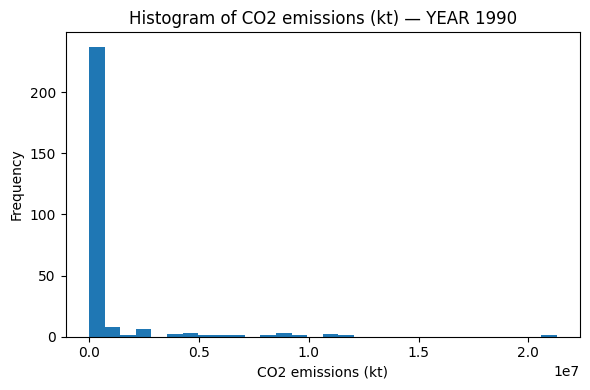

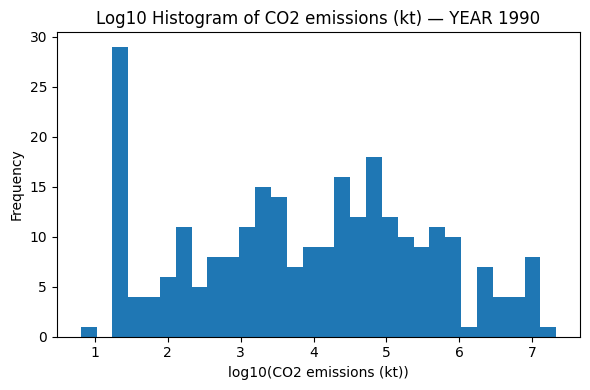

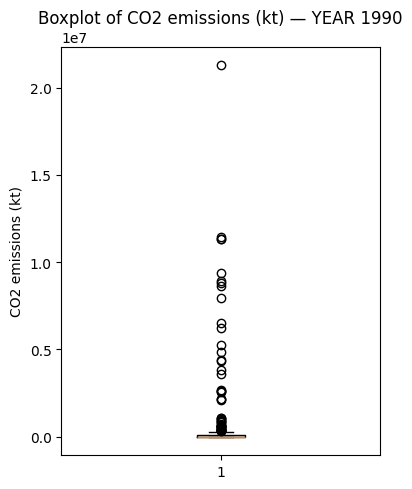

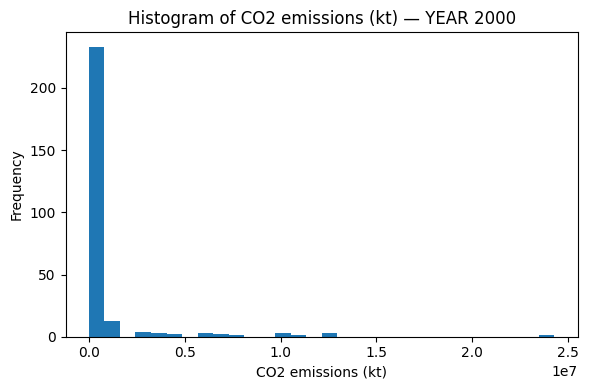

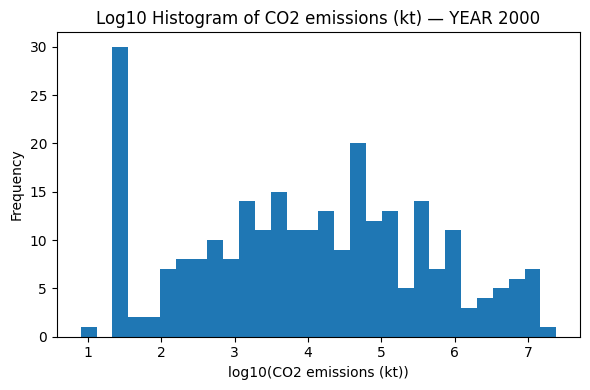

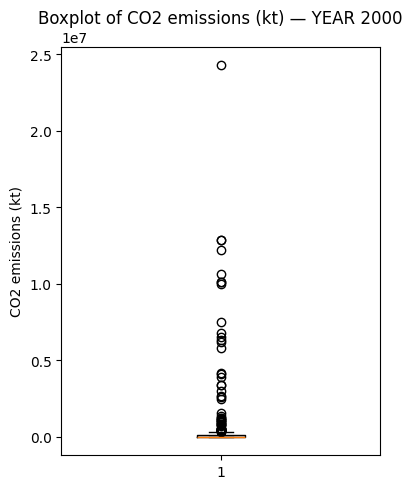

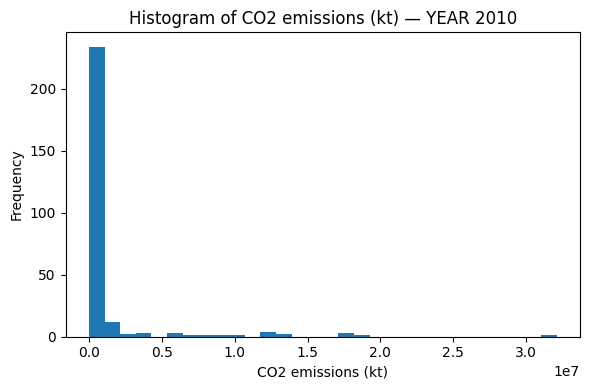

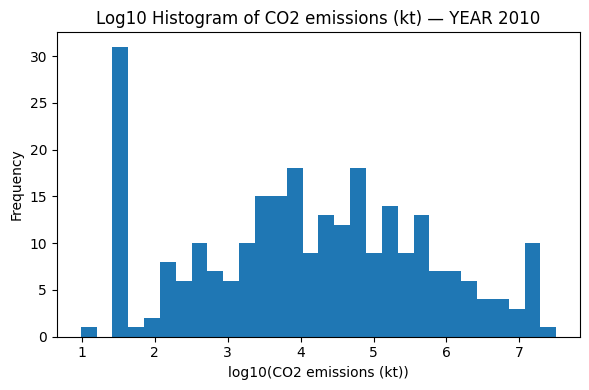

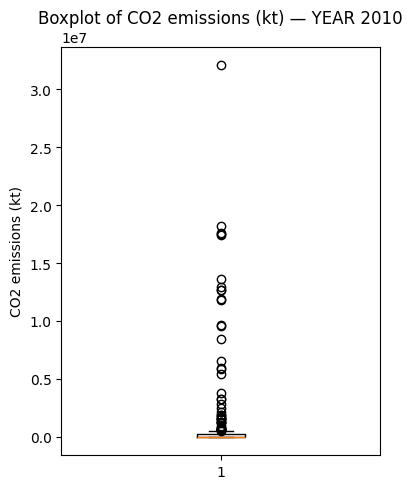

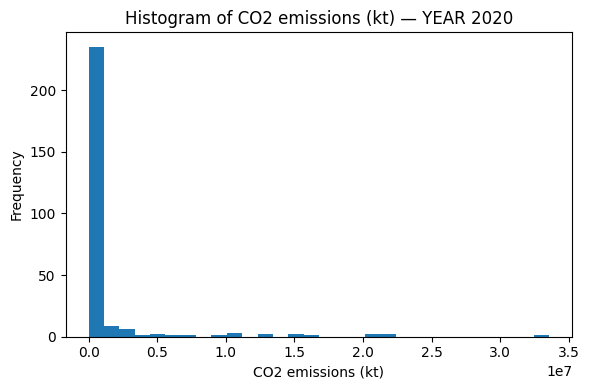

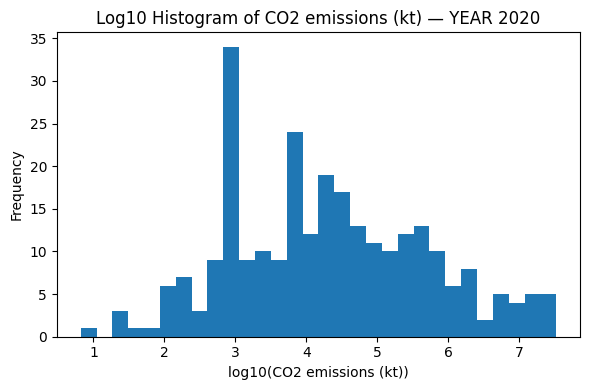

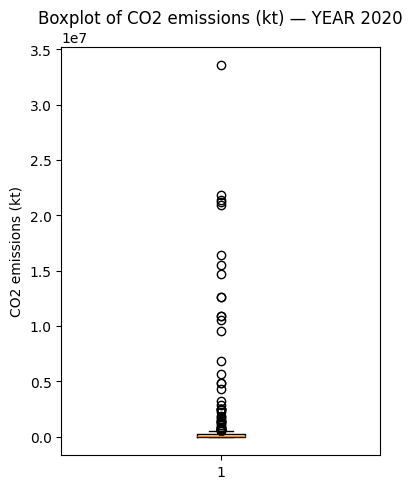

Top 15 Country Name:


Country Name
Afghanistan                   124
Africa Western and Central     62
Albania                        62
Algeria                        62
American Samoa                 62
Andorra                        62
Angola                         62
Antigua and Barbuda            62
Arab World                     62
Argentina                      62
Armenia                        62
Serbia                         62
Chad                           62
Russian Federation             62
Rwanda                         62
Name: count, dtype: int64

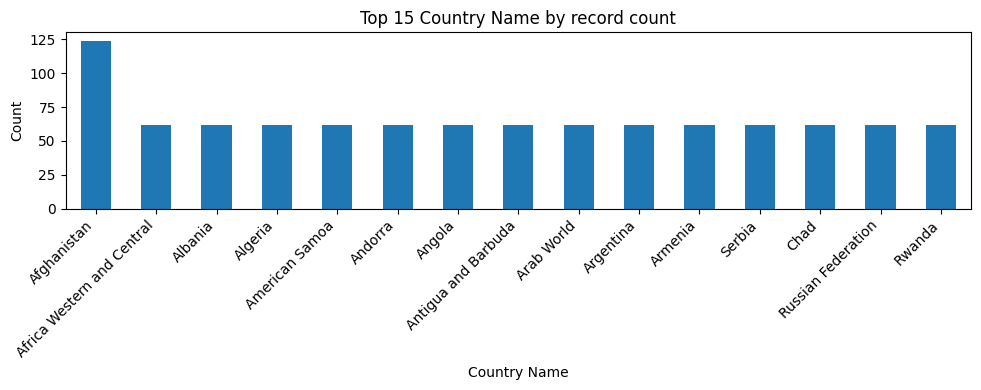

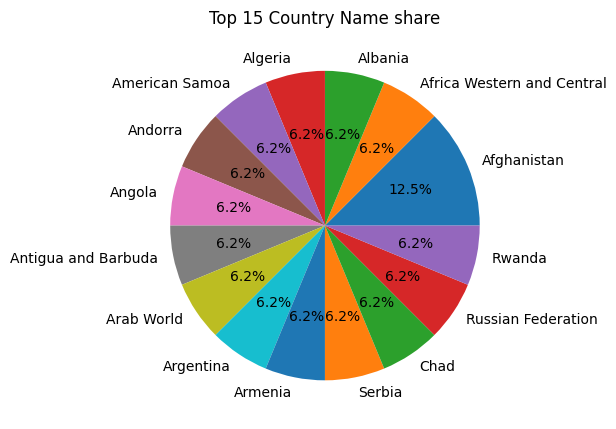

In [4]:

# Pick a main emissions metric for analysis
main_emission_col = None
for cand in [
    "CO2 emissions (kt)",
    "Total greenhouse gas emissions (kt of CO2 equivalent)",
    "CO2 emissions (metric tons per capita)"
]:
    if cand in df.columns:
        main_emission_col = cand
        break

if main_emission_col is None:
    # fallback: first numeric column that is not YEAR
    numeric_no_year = [c for c in numeric_cols if c != "YEAR"]
    main_emission_col = numeric_no_year[0] if numeric_no_year else None

print("Main emissions column used for univariate analysis:", main_emission_col)

# === 4.1 Histograms & Boxplots for Selected Years ===

years_to_analyze = [1990, 2000, 2010, 2020]
for year in years_to_analyze:
    if "YEAR" in df.columns and main_emission_col is not None:
        subset = df[df["YEAR"] == year][main_emission_col].dropna()
        if subset.empty:
            print(f"⚠️ No data for YEAR = {year} in column '{main_emission_col}'.")
            continue

        # Histogram (original scale)
        plt.figure(figsize=(6,4))
        plt.hist(subset, bins=30)
        plt.title(f"Histogram of {main_emission_col} — YEAR {year}")
        plt.xlabel(main_emission_col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        # Histogram (log scale, only positive values)
        positive = subset[subset > 0]
        if not positive.empty:
            plt.figure(figsize=(6,4))
            plt.hist(np.log10(positive), bins=30)
            plt.title(f"Log10 Histogram of {main_emission_col} — YEAR {year}")
            plt.xlabel(f"log10({main_emission_col})")
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()

        # Boxplot
        plt.figure(figsize=(4,5))
        plt.boxplot(subset, vert=True)
        plt.title(f"Boxplot of {main_emission_col} — YEAR {year}")
        plt.ylabel(main_emission_col)
        plt.tight_layout()
        plt.show()

# === 4.2 Categorical: Country distribution ===

country_col = None
for cand in ["Country Name", "COUNTRY", "country"]:
    if cand in df.columns:
        country_col = cand
        break

if country_col is not None:
    top_countries = df[country_col].value_counts().head(15)
    print(f"Top 15 {country_col}:")
    display(top_countries)

    plt.figure(figsize=(10,4))
    top_countries.plot(kind="bar")
    plt.title(f"Top 15 {country_col} by record count")
    plt.xlabel(country_col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,6))
    top_countries.plot(kind="pie", autopct="%1.1f%%")
    plt.title(f"Top 15 {country_col} share")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No country-like column found for categorical univariate analysis.")


## 5) Bivariate Analysis

We now look at **relationships between two variables**:

- Numerical vs numerical (e.g., CO₂ vs GHG, or emissions at different years)  
- Categorical vs numerical (e.g., emissions distribution for top countries)  


Secondary emissions column for bivariate analysis: Total greenhouse gas emissions (kt of CO2 equivalent)


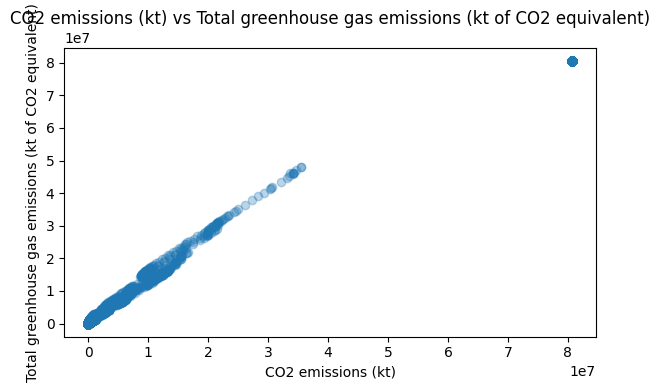

Correlation between 'CO2 emissions (kt)' and 'Total greenhouse gas emissions (kt of CO2 equivalent)': 0.996


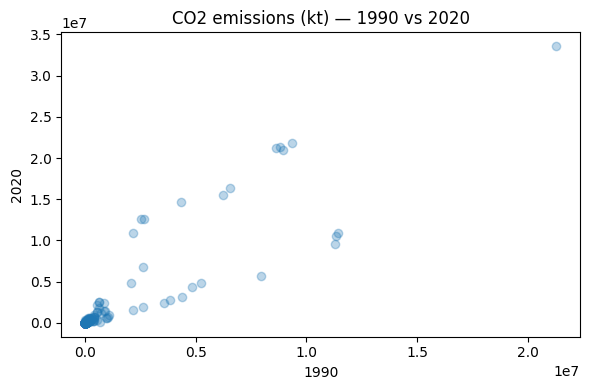

Correlation of CO2 emissions (kt) between 1990 and 2020: 0.895


C:\Users\brien\AppData\Local\Temp\ipykernel_23504\2524206260.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top5_countries)


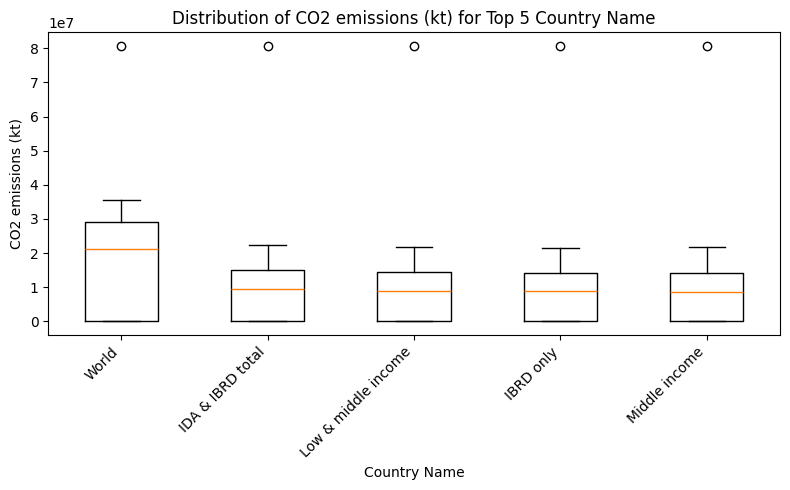

In [5]:

# === 5.1 Numeric vs Numeric: main emission vs another metric ===

# Choose a secondary emissions metric
secondary_col = None
candidates = [
    "Total greenhouse gas emissions (kt of CO2 equivalent)",
    "Methane emissions (kt of CO2 equivalent)",
    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"
]
for cand in candidates:
    if cand in df.columns and cand != main_emission_col:
        secondary_col = cand
        break

print("Secondary emissions column for bivariate analysis:", secondary_col)

if main_emission_col is not None and secondary_col is not None:
    plt.figure(figsize=(6,4))
    plt.scatter(df[main_emission_col], df[secondary_col], alpha=0.3)
    plt.title(f"{main_emission_col} vs {secondary_col}")
    plt.xlabel(main_emission_col)
    plt.ylabel(secondary_col)
    plt.tight_layout()
    plt.show()

    corr_val = df[[main_emission_col, secondary_col]].corr().iloc[0,1]
    print(f"Correlation between '{main_emission_col}' and '{secondary_col}': {corr_val:.3f}")

# === 5.2 Numeric vs Numeric: same metric, different years ===

if "YEAR" in df.columns and main_emission_col is not None:
    # Pivot to have YEAR as columns for main_emission_col
    pivot = df.pivot_table(index=country_col, columns="YEAR", values=main_emission_col)

    year_x, year_y = 1990, 2020
    if year_x in pivot.columns and year_y in pivot.columns:
        x_vals = pivot[year_x]
        y_vals = pivot[year_y]

        plt.figure(figsize=(6,4))
        plt.scatter(x_vals, y_vals, alpha=0.3)
        plt.title(f"{main_emission_col} — {year_x} vs {year_y}")
        plt.xlabel(f"{year_x}")
        plt.ylabel(f"{year_y}")
        plt.tight_layout()
        plt.show()

        corr_xy = x_vals.corr(y_vals)
        print(f"Correlation of {main_emission_col} between {year_x} and {year_y}: {corr_xy:.3f}")
    else:
        print("Not enough YEAR coverage for 1990 and 2020 in the pivoted data.")

# === 5.3 Categorical vs Numeric: boxplot of top 5 countries ===

if country_col is not None and main_emission_col is not None:
    # Compute mean emission per country
    mean_by_country = df.groupby(country_col)[main_emission_col].mean().sort_values(ascending=False)
    top5_countries = mean_by_country.head(5).index

    subset = df[df[country_col].isin(top5_countries)]

    data_to_plot = [subset[subset[country_col] == c][main_emission_col] for c in top5_countries]

    plt.figure(figsize=(8,5))
    plt.boxplot(data_to_plot, labels=top5_countries)
    plt.title(f"Distribution of {main_emission_col} for Top 5 {country_col}")
    plt.xlabel(country_col)
    plt.ylabel(main_emission_col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


## 6) Multivariate Analysis (Correlation & Scatter Matrix)

To understand how multiple indicators move together, we will:

- Compute a **correlation matrix** for a subset of key emissions variables  
- Visualize it using a **heatmap-style image**  
- Use a **scatter matrix** to inspect pairwise relationships  


Key emissions used for multivariate analysis:
['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'Methane emissions (kt of CO2 equivalent)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Total greenhouse gas emissions (kt of CO2 equivalent)']


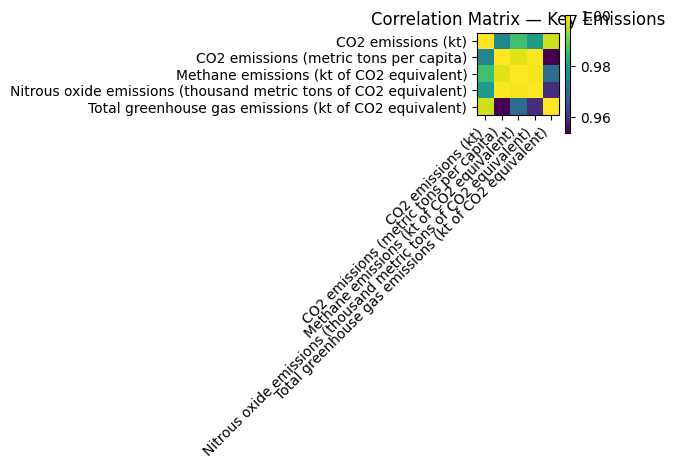

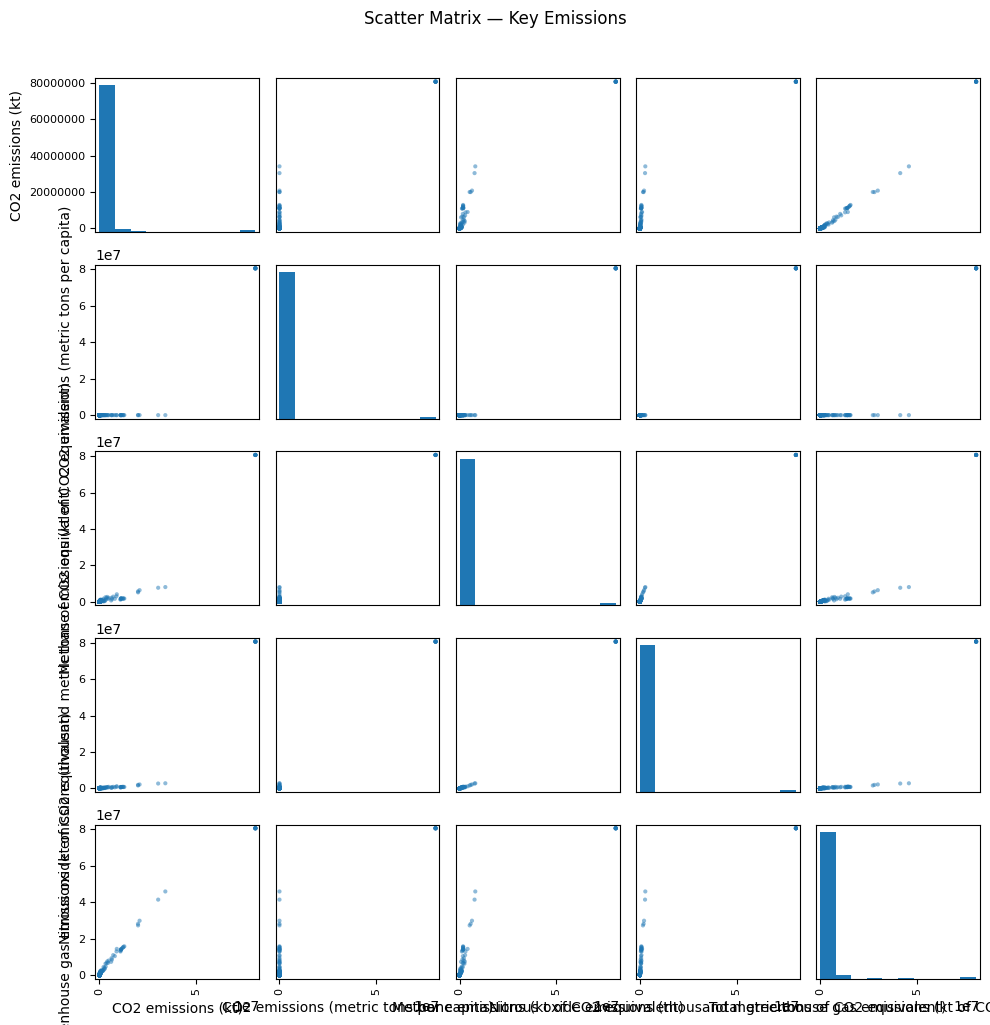

In [6]:

# Choose a small set of key emission columns
key_emissions = []

for cand in [
    "CO2 emissions (kt)",
    "CO2 emissions (metric tons per capita)",
    "Methane emissions (kt of CO2 equivalent)",
    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
    "Total greenhouse gas emissions (kt of CO2 equivalent)"
]:
    if cand in df.columns:
        key_emissions.append(cand)

# Ensure YEAR is not included here (focus on indicators)
print("Key emissions used for multivariate analysis:")
print(key_emissions)

if len(key_emissions) >= 2:
    corr_subset = df[key_emissions].corr()

    # Correlation "heatmap" with matplotlib
    plt.figure(figsize=(6,5))
    plt.imshow(corr_subset, interpolation="nearest")
    plt.title("Correlation Matrix — Key Emissions")
    plt.colorbar()
    plt.xticks(range(len(key_emissions)), key_emissions, rotation=45, ha="right")
    plt.yticks(range(len(key_emissions)), key_emissions)
    plt.tight_layout()
    plt.show()

    # Scatter matrix (sample to keep it light)
    sample = df[key_emissions].sample(min(600, len(df)), random_state=42)
    scatter_matrix(sample, figsize=(10,10))
    plt.suptitle("Scatter Matrix — Key Emissions", y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough key emission columns found for multivariate analysis.")


## 7) Summary of Insights


- **Distribution shape:** CO₂ and GHG emissions are usually **right-skewed**, with a few very high-emitting countries and many low emitters.  
- **Temporal stability:** Countries with high emissions in earlier years (e.g., 1990) tend to remain high emitters in later years (e.g., 2020), as seen in cross-year scatterplots.  
- **Cross-indicator relationships:** Strong positive correlations often appear between CO₂, methane, nitrous oxide, and total GHG emissions, suggesting they move together and may be partially redundant as model features.  
- **Country differences:** Boxplots and group summaries highlight that a small set of countries contributes disproportionately to global emissions.  
- **Multivariate structure:** Correlation and scatter matrices reveal clusters of indicators that behave similarly, guiding feature selection for modeling or further analysis.  

